In [24]:
from dataLoader import ADNIDataset
from model import ResNet
from train import run_train
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
adni = ADNIDataset()

AD MRI scans: 184
CN MRI scans: 293
Number of samples in train, validation, and test are 288, 40, and 40


In [3]:
train_loader = adni.train_loader
val_loader = adni.val_loader
test_loader = adni.test_loader

In [10]:
device = torch.device("mps")
model = ResNet().to(device)

optim = torch.optim.Adam(model.parameters(), lr=0.001)

lr_scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=10, gamma=0.65)
criterion = torch.nn.NLLLoss()

summary(model, (1, 91, 109, 91))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv3d: 1-1                            [-1, 8, 46, 55, 46]       2,752
├─MaxPool3d: 1-2                         [-1, 8, 22, 27, 22]       --
├─Sequential: 1-3                        [-1, 8, 22, 27, 22]       --
|    └─ResNetBlock: 2-1                  [-1, 8, 22, 27, 22]       --
|    |    └─Sequential: 3-1              [-1, 8, 22, 27, 22]       892
|    └─ResNetBlock: 2-2                  [-1, 8, 22, 27, 22]       --
|    |    └─Sequential: 3-2              [-1, 8, 22, 27, 22]       892
├─Sequential: 1-4                        [-1, 16, 11, 14, 11]      --
|    └─ResNetBlock: 2-3                  [-1, 16, 11, 14, 11]      --
|    |    └─Sequential: 3-3              [-1, 16, 11, 14, 11]      1,324
|    |    └─Conv3d: 3-4                  [-1, 16, 11, 14, 11]      3,472
|    └─ResNetBlock: 2-4                  [-1, 16, 11, 14, 11]      --
|    |    └─Sequential: 3-5              [-1, 16, 11, 14, 11]      3,520
├

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv3d: 1-1                            [-1, 8, 46, 55, 46]       2,752
├─MaxPool3d: 1-2                         [-1, 8, 22, 27, 22]       --
├─Sequential: 1-3                        [-1, 8, 22, 27, 22]       --
|    └─ResNetBlock: 2-1                  [-1, 8, 22, 27, 22]       --
|    |    └─Sequential: 3-1              [-1, 8, 22, 27, 22]       892
|    └─ResNetBlock: 2-2                  [-1, 8, 22, 27, 22]       --
|    |    └─Sequential: 3-2              [-1, 8, 22, 27, 22]       892
├─Sequential: 1-4                        [-1, 16, 11, 14, 11]      --
|    └─ResNetBlock: 2-3                  [-1, 16, 11, 14, 11]      --
|    |    └─Sequential: 3-3              [-1, 16, 11, 14, 11]      1,324
|    |    └─Conv3d: 3-4                  [-1, 16, 11, 14, 11]      3,472
|    └─ResNetBlock: 2-4                  [-1, 16, 11, 14, 11]      --
|    |    └─Sequential: 3-5              [-1, 16, 11, 14, 11]      3,520
├

In [65]:
# run_train(model, train_loader, val_loader, test_loader, device, optim, criterion, lr_scheduler, epochs=10)

In [57]:
from heatmap import heatmap
hp = heatmap(model, adni.cn_scans, 175)
heatmap1 = hp.GradCAM()
heatmap2 = hp.HiResCAM()

Prediction:  tensor([[-2.0265e-05, -1.0809e+01]], grad_fn=<LogSoftmaxBackward0>)
Prediction:  tensor([[-2.0265e-05, -1.0809e+01]], grad_fn=<LogSoftmaxBackward0>)


Text(0.5, 1.0, 'Heatmap')

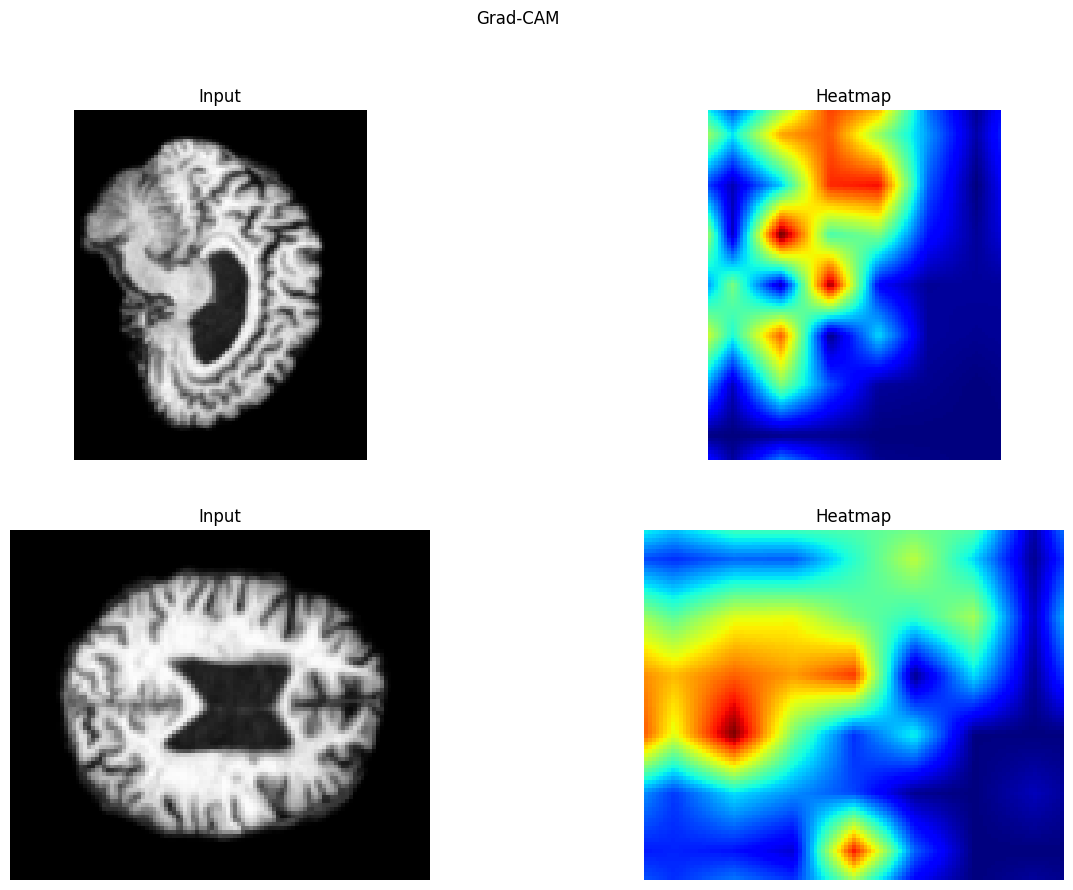

In [58]:
resized_img = np.squeeze(adni.ad_scans[175])
heatmap = resize(heatmap1, (91, 109, 91))
heatmap = (heatmap - np.min(heatmap))/np.ptp(heatmap)

f, axarr = plt.subplots(2,2,figsize=(15,10));
f.suptitle('Grad-CAM')
slice_count=50
slice_count2=50
    
axial_ct_img=np.squeeze(resized_img[slice_count, :,:])
axial_grad_cmap_img=np.squeeze(heatmap[slice_count,:, :])

coronal_ct_img=np.squeeze(resized_img[:, :, slice_count2])
coronal_grad_cmap_img=np.squeeze(heatmap[:, :, slice_count2]) 

img_plot = axarr[0,0].imshow(axial_ct_img, cmap='gray');
axarr[0,0].axis('off')
axarr[0,0].set_title('Input')
    
img_plot = axarr[0,1].imshow(axial_grad_cmap_img, cmap='jet');
axarr[0,1].axis('off')
axarr[0,1].set_title('Heatmap')


img_plot = axarr[1,0].imshow(coronal_ct_img, cmap='gray');
axarr[1,0].axis('off')
axarr[1,0].set_title('Input')
    
img_plot = axarr[1,1].imshow(coronal_grad_cmap_img, cmap='jet');
axarr[1,1].axis('off')
axarr[1,1].set_title('Heatmap')

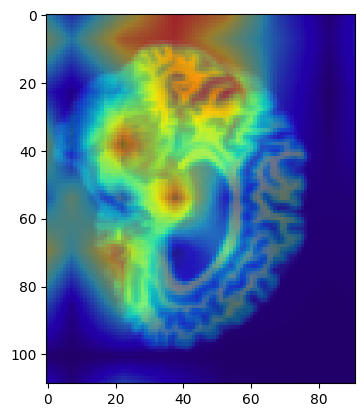

In [59]:
plt.imshow(axial_ct_img)
plt.imshow(axial_grad_cmap_img, alpha=0.5, cmap="jet")

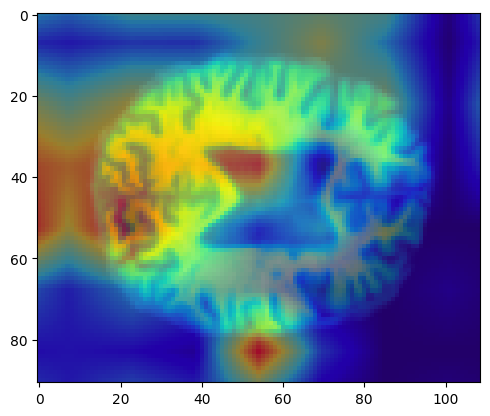

In [60]:
plt.imshow(coronal_ct_img)
plt.imshow(coronal_grad_cmap_img, alpha=0.5, cmap="jet")

Text(0.5, 1.0, 'Heatmap')

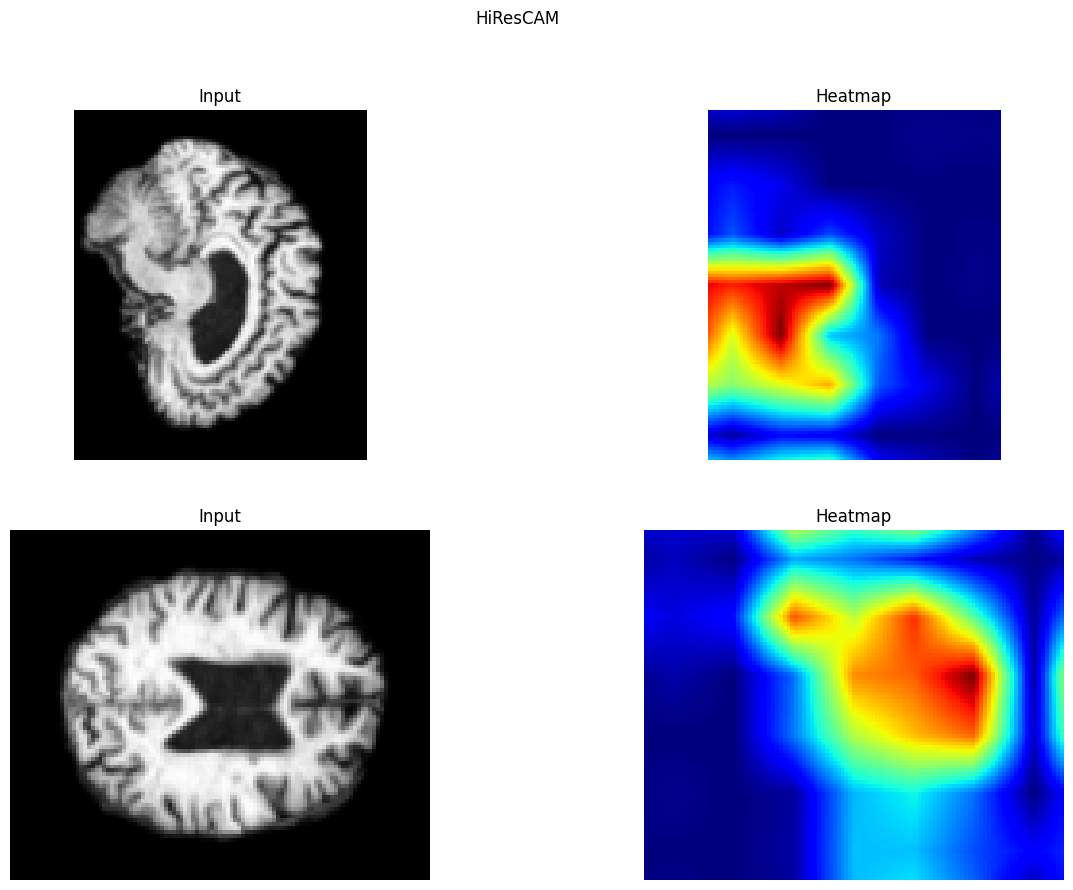

In [62]:
resized_img = np.squeeze(adni.ad_scans[175])
heatmap = resize(heatmap2, (91, 109, 91))
heatmap = (heatmap - np.min(heatmap))/np.ptp(heatmap)

f, axarr = plt.subplots(2,2,figsize=(15,10));
f.suptitle('HiResCAM')
slice_count=50
slice_count2=50
    
axial_ct_img=np.squeeze(resized_img[slice_count, :,:])
axial_grad_cmap_img=np.squeeze(heatmap[slice_count,:, :])

coronal_ct_img=np.squeeze(resized_img[:, :, slice_count2])
coronal_grad_cmap_img=np.squeeze(heatmap[:, :, slice_count2]) 

img_plot = axarr[0,0].imshow(axial_ct_img, cmap='gray');
axarr[0,0].axis('off')
axarr[0,0].set_title('Input')
    
img_plot = axarr[0,1].imshow(axial_grad_cmap_img, cmap='jet');
axarr[0,1].axis('off')
axarr[0,1].set_title('Heatmap')


img_plot = axarr[1,0].imshow(coronal_ct_img, cmap='gray');
axarr[1,0].axis('off')
axarr[1,0].set_title('Input')
    
img_plot = axarr[1,1].imshow(coronal_grad_cmap_img, cmap='jet');
axarr[1,1].axis('off')
axarr[1,1].set_title('Heatmap')

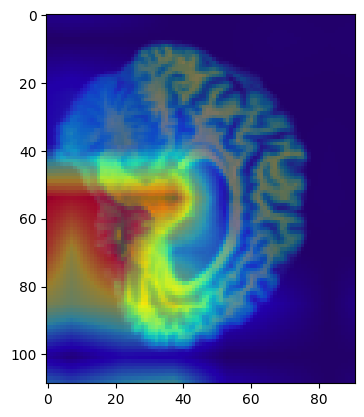

In [63]:
plt.imshow(axial_ct_img)
plt.imshow(axial_grad_cmap_img, alpha=0.5, cmap="jet")

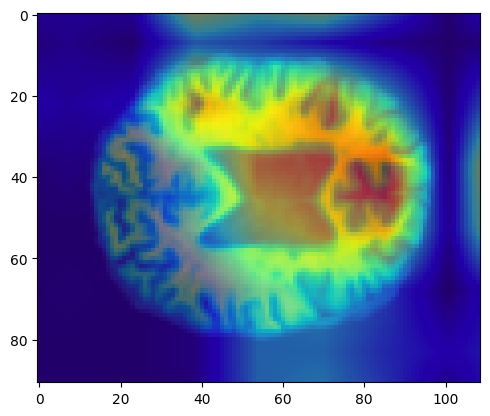

In [64]:
plt.imshow(coronal_ct_img)
plt.imshow(coronal_grad_cmap_img, alpha=0.5, cmap="jet")